In [1]:
import sys
sys.path.append('/home/jbourbeau/cr-composition')
sys.path

['',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python2.7/site-packages/setuptools-15.2-py2.7.egg',
 '/home/jbourbeau/.local/lib/python2.7/site-packages',
 '/opt/rh/devtoolset-2/root/usr/lib64/python2.7/site-packages',
 '/opt/rh/devtoolset-2/root/usr/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/i3ports/root-v5.34.18/lib',
 '/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/lib/python2.7/site-packages',
 '/cvmfs/icecube.opensciencegrid.org/py2-v2/RHEL_6_x86_64/i3ports/lib/python2.7/site-packages',
 '/data/user/jbourbeau/metaprojects/icerec/trunk/build/lib',
 '/home/jbourbeau/cr-composition/analysis',
 '/home/jbourbeau',
 '/home/jbourbeau/useful',
 '/home/jbourbeau/anisotropy',
 '/home/jbourbeau/ShowerLLH_scripts',
 '/home/jbourbeau/cr-composition',
 '/home/jbourbeau/dagmanager',
 '/home/jbourbeau/pycondor',
 '/cvmfs/icecube.opensciencegrid.org/py2-v1/RHEL_6_x86_64/lib/python27.zip',
 '/cvmfs/icecube.opensciencegrid.org/

In [2]:
import numpy as np
import pandas as pd
from pandas.tools.plotting import radviz
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn.apionly as sns
from collections import defaultdict

from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve, GridSearchCV, cross_val_score, ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

import composition as comp

# Plotting-related
sns.set_palette('muted')
sns.set_color_codes()
color_dict = defaultdict()
for i, composition in enumerate(['light', 'heavy', 'total']):
    color_dict[composition] = sns.color_palette('muted').as_hex()[i]
%matplotlib inline

/home/jbourbeau/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
sns.set_palette('muted')
sns.set_color_codes()

In [4]:
df_sim = comp.load_dataframe(datatype='sim', config='IC79')

feature_list, feature_labels = comp.get_training_features()
print('training features = {}'.format(feature_list))
X_train, X_test, y_train, y_test, le = comp.get_train_test_sets(df_sim, feature_list)

print('number training events = ' + str(y_train.shape[0]))

sim quality cut event flow:
             IceTopQualityCuts:    1.0    1.0
         lap_InIce_containment:  0.776  0.776
             reco_energy_range:  0.654  0.493
                 num_hits_1_60:  0.996  0.493
                max_qfrac_1_60:  0.998  0.493
              InIceQualityCuts:  0.784  0.486




/home/jbourbeau/cr-composition/composition/dataframe_functions.py:124: RuntimeWarning: divide by zero encountered in log10
  df['log_NChannels_'+i] = np.log10(df['NChannels_'+i])
/home/jbourbeau/cr-composition/composition/dataframe_functions.py:125: RuntimeWarning: divide by zero encountered in log10
  df['log_NHits_'+i] = np.log10(df['NHits_'+i])


training features = ['lap_cos_zenith', 'log_s125', 'InIce_log_charge_1_30', 'charge_nchannels_ratio', 'nhits_nchannels_ratio', 'eloss_1500_standard']


AttributeError: 'module' object has no attribute 'get_train_test_sets'

In [4]:
df['lap_likelihood'][df['MC_comp'] == 'He'].values[:100]

array([ -1.30412476,  -1.57385901,  -1.01663487,  -1.58376905,
        -1.00989601,  -0.71455711,  -0.77886031,  -1.07185769,
        -1.11143146,  -0.89604376,  -1.38911762,  -1.20401424,
        -1.20485737,  -1.81987366,  -0.83622682,  -1.22611465,
        -1.32099059,  -1.303859  ,  -1.02379808,  -0.86396626,
        -1.24409283,  -0.78822118,  -1.32140157,  -1.2752146 ,
        -1.17789774,  -0.87541731,  -0.6868446 ,  -1.2386133 ,
        -1.24929963,  -1.25692267,  -1.28884625,  -1.06075043,
        -1.44815366,  -1.11459266,  -1.14262954,  -1.35282971,
        -1.05475907,  -1.25123389,  -0.94833348,  -1.44373246,
        -0.82509381,  -0.90234551,  -1.20284723,  -1.22963704,
        -1.15737421,  -1.40724228,  -1.2004617 , -14.0718421 ,
        -1.13867399,  -7.8605686 ,  -1.20722066,  -1.25087001,
        -1.19948892,  -1.12484307,  -1.12562165,  -1.43004042,
        -1.29763623,  -1.12405603,  -0.99147217,  -1.07910855,
        -0.9915201 ,  -1.35868033,  -1.05577945,  -1.06

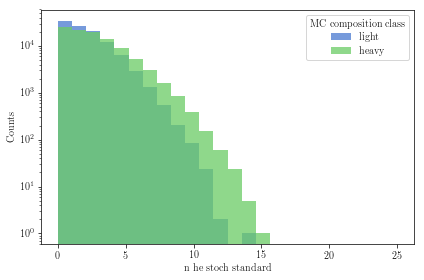

In [8]:
fig, ax = plt.subplots()
comp_list = ['light', 'heavy']
for composition in comp_list:
    llhratio = df_sim['eloss_'][df_sim['MC_comp_class'] == composition]
#     print(np.isnan(llhratio.values))
#     print(np.argwhere(np.isnan(llhratio.values)))
    ax.hist(llhratio.values, bins=np.linspace(0, 25, 25), log=True, label=composition, alpha=0.75)
    ax.set_xlabel('dE/dX (X=1500 m)')
    ax.set_ylabel('Counts')
plt.legend(title='MC composition class')
plt.show()

In [ ]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    energy = df['lap_log_energy'][df['MC_comp'] == composition]
    ax.hist(energy, bins=np.linspace(6.2, 8, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    charge = df['InIce_log_charge_1_30'][df['MC_comp'] == composition]
    ax.hist(charge, bins=np.linspace(0, 6, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()

In [ ]:
df, cut_dict = comp.load_sim(return_cut_dict=True)
selection_mask = np.array([True] * len(df))
standard_cut_keys = ['lap_reco_success', 'lap_zenith', 'num_hits_45_60', 'IT_signal',
                     'StationDensity', 'max_qfrac_45_60', 'lap_containment', 'energy_range_lap']
for key in standard_cut_keys:
    selection_mask *= cut_dict[key]

df = df[selection_mask]

fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    charge = df['InIce_log_charge_45_60'][df['MC_comp'] == composition]
    ax.hist(charge, bins=np.linspace(0, 6, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    nchannels = df['log_NChannels_1_30'][df['MC_comp'] == composition]
    ax.hist(nchannels, bins=np.linspace(0, 3, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
comp_list = ['P', 'He', 'Fe']
for composition in comp_list:
    s125 = df['log_s125'][df['MC_comp'] == composition]
    ax.hist(s125, bins=np.linspace(0, 3, 100), log=True, label=composition, alpha=0.75)
plt.legend()
plt.show()